Major Findings: 

Is there correlation between alcohol consumption and/or type and gender?
Gender % of state population of 14+ has a weak correlation to total consumption and type of consumption. Next steps would be comparing gender to drinking patterns vs. total consumption. 

Is there correlation between alcohol consumption and personal income?
There is a weak positive correlation of total consumption per capita vs. personal income per capita. Next steps would be comparing tax rates to total consumption per capita. 



In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress


In [2]:
#load cdc data 
cdc_pop_load = "CDCPopulationGender.csv"

cdc_pop_data = pd.read_csv(cdc_pop_load)

cdc_pop_df = cdc_pop_data 

cdc_pop_df.head()

#delete extra year column
del cdc_pop_df['Yearly July 1st Estimates Code']

cdc_pop_df = cdc_pop_df.rename(columns={'Yearly July 1st Estimates':'Year'})


#make state lower
cdc_pop_df['State']=cdc_pop_df['State'].str.lower()

cdc_pop_df.head()

#clean up fields 
del cdc_pop_df["Gender Code"]

In [3]:
#create data frame for females
female_df = cdc_pop_df.loc[cdc_pop_df['Gender']=="Female"]

female_df
#create data frame for males
male_df =cdc_pop_df.loc[cdc_pop_df['Gender']=="Male"]

male_df


,State,State Code,Gender,Year,Population
30,alabama,1,Male,1990,1525176.0
31,alabama,1,Male,1991,1545123.0
32,alabama,1,Male,1992,1569192.0
33,alabama,1,Male,1993,1595125.0
34,alabama,1,Male,1994,1616332.0
...,...,...,...,...,...
3055,wyoming,56,Male,2015,242678.0
3056,wyoming,56,Male,2016,242087.0
3057,wyoming,56,Male,2017,240232.0
3058,wyoming,56,Male,2018,240123.0


In [4]:
#merge together with new columns 
genders_data = pd.merge(female_df,male_df, how="inner",on=['State','Year'])

genders_data.head()

#rename columns
genders_data = genders_data.rename(columns={'Population_x':'Females',
                                       'Population_y': 'Males',
                                           "State Code_x":"State Code"})

genders_data.head()

#delete unnecessary fields
del genders_data['Gender_x']
del genders_data['Gender_y']
del genders_data['State Code_y']

#calculate total population
genders_data['Total Population'] = genders_data['Females'] + genders_data['Males']
genders_data['% Female']= genders_data['Females']/genders_data['Total Population']
genders_data['% Male'] = genders_data['Males']/genders_data['Total Population']

#print head
genders_data

,State,State Code,Year,Females,Males,Total Population,% Female,% Male
0,alabama,1,1990,1712799.0,1525176.0,3237975.0,0.528972,0.471028
1,alabama,1,1991,1733472.0,1545123.0,3278595.0,0.528724,0.471276
2,alabama,1,1992,1755757.0,1569192.0,3324949.0,0.528055,0.471945
3,alabama,1,1993,1781034.0,1595125.0,3376159.0,0.527533,0.472467
4,alabama,1,1994,1802008.0,1616332.0,3418340.0,0.527159,0.472841
...,...,...,...,...,...,...,...,...
1525,wyoming,56,2015,232946.0,242678.0,475624.0,0.489769,0.510231
1526,wyoming,56,2016,232772.0,242087.0,474859.0,0.490192,0.509808
1527,wyoming,56,2017,231835.0,240232.0,472067.0,0.491106,0.508894
1528,wyoming,56,2018,232222.0,240123.0,472345.0,0.491636,0.508364


In [5]:
#load csv file
alcohol_data_load = "Per Capita Alcohol Consumption 1977_2018.csv"

alcohol_data = pd.read_csv(alcohol_data_load)
alcohol_data_df = alcohol_data

#print header
alcohol_data_df.head()

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879156,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667


In [6]:
#merge gender data with alcohol consumption data
gender_alc_data = pd.merge(genders_data,alcohol_data, how="inner",left_on=['State','Year'],right_on=['state','year'])


#delete repeart fields
del gender_alc_data['state']
del gender_alc_data['year']

gender_alc_data.head()

,State,State Code,Year,Females,Males,Total Population,% Female,% Male,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,1,1990,1712799.0,1525176.0,3237975.0,0.528972,0.471028,1.12,0.18,0.61,1.92,265.481481,35.720930,126.650446,409.600000
1,alabama,1,1991,1733472.0,1545123.0,3278595.0,0.528724,0.471276,1.00,0.17,0.59,1.76,237.037037,33.736434,122.497972,375.466667
2,alabama,1,1992,1755757.0,1569192.0,3324949.0,0.528055,0.471945,1.02,0.19,0.59,1.79,241.777778,37.705426,122.497972,381.866667
3,alabama,1,1993,1781034.0,1595125.0,3376159.0,0.527533,0.472467,1.14,0.17,0.56,1.86,270.222222,33.736434,116.269262,396.800000
4,alabama,1,1994,1802008.0,1616332.0,3418340.0,0.527159,0.472841,1.16,0.17,0.54,1.87,274.962963,33.736434,112.116788,398.933333


In [7]:
#load csv
beapopulation_data_load = "Outputpopulation.csv"

#read csv
population_data = pd.read_csv(beapopulation_data_load)
population_data.head()

#drop NAs
population_data.dropna(subset = ["BEA Population"], inplace=True)

#make state lowercase
population_data['GeoName']=population_data['GeoName'].str.lower()


#convert BEA population to integer
population_data["BEA Population"]=population_data["BEA Population"].astype(int)

#filter for 1990 and greater
population_data = population_data[population_data['Year']>=1990]





In [8]:
#load per capita income data
beaincome_data_load = 'Outputpercapitaincome.csv'

#read csv
income_data = pd.read_csv(beaincome_data_load)

#make state lowercase
income_data['GeoName']=income_data['GeoName'].str.lower()

#drop NAs 
income_data.dropna(subset = ["Per Capita Personal Income"], inplace=True)

#filter for 1990 and greater
income_data = income_data[income_data['Year']>=1990]


income_data.head()

,GeoFips,GeoName,Year,Per Capita Personal Income
1200,0,united states,1990,19621.0
1201,1000,alabama,1990,15861.0
1202,2000,alaska,1990,23213.0
1203,4000,arizona,1990,17323.0
1204,5000,arkansas,1990,14622.0


In [9]:
#merge data sets
bea_data = pd.merge(income_data,population_data, how="inner",left_on=['GeoName','Year'],right_on =['GeoName','Year'])


#delete columns not needed
del bea_data['GeoFips_x']
del bea_data['GeoFips_y']



#rename state column
bea_data = bea_data.rename(columns={'GeoName':'State'})

#print header
bea_data.head()

,State,Year,Per Capita Personal Income,BEA Population
0,united states,1990,19621.0,249622814
1,alabama,1990,15861.0,4050055
2,arizona,1990,17323.0,3684097
3,arkansas,1990,14622.0,2356586
4,california,1990,21485.0,29959515


In [10]:
#merge bea data and gender/alcohol consumption data
all_data = pd.merge(bea_data,gender_alc_data, how="inner",left_on=['State','Year'],right_on =['State','Year'])

all_data = all_data.rename(columns={'ethanol_beer_gallons_per_capita':'Beer Consumption',
                                   'ethanol_wine_gallons_per_capita': 'Wine Consumption',
                                   'ethanol_spirit_gallons_per_capita': 'Spirit Consumption',
                                   'ethanol_all_drinks_gallons_per_capita': 'All Consumption'})

all_data.head()




,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,Beer Consumption,Wine Consumption,Spirit Consumption,All Consumption,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,1990,15861.0,4050055,1,1712799.0,1525176.0,3237975.0,0.528972,0.471028,1.12,0.18,0.61,1.92,265.481481,35.720930,126.650446,409.600000
1,arizona,1990,17323.0,3684097,4,1469424.0,1408380.0,2877804.0,0.510606,0.489394,1.59,0.37,0.80,2.77,376.888889,73.426357,166.098946,590.933333
2,arkansas,1990,14622.0,2356586,5,985649.0,889120.0,1874769.0,0.525744,0.474256,1.12,0.13,0.61,1.86,265.481481,25.798450,126.650446,396.800000
3,california,1990,21485.0,29959515,6,11823050.0,11709410.0,23532460.0,0.502415,0.497585,1.32,0.59,0.87,2.78,312.888889,117.085271,180.632603,593.066667
4,colorado,1990,19853.0,3307618,8,1323273.0,1276027.0,2599300.0,0.509088,0.490912,1.35,0.29,0.75,2.39,320.000000,57.550388,155.717762,509.866667


In [11]:
#find max year
max_year = all_data['Year'].max()

max_year

2018

In [12]:
#create df for max year analysis
max_year_df = all_data[all_data['Year']==2018]

max_year_df.head()

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,Beer Consumption,Wine Consumption,Spirit Consumption,All Consumption,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
1323,alabama,2018,42710.0,4887681,1,2111195.0,1934462.0,4045657.0,0.521842,0.478158,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1324,arizona,2018,44597.0,7158024,4,2980282.0,2912309.0,5892591.0,0.505768,0.494232,1.08,0.39,0.79,2.25,256.000000,77.395349,164.022709,480.000000
1325,arkansas,2018,43325.0,3009733,5,1266004.0,1199293.0,2465297.0,0.513530,0.486470,0.90,0.23,0.64,1.78,213.333333,45.643411,132.879156,379.733333
1326,california,2018,63720.0,39461588,6,16444369.0,16060513.0,32504882.0,0.505905,0.494095,1.00,0.62,0.87,2.49,237.037037,123.038760,180.632603,531.200000
1327,colorado,2018,58896.0,5691287,8,2348485.0,2367410.0,4715895.0,0.497993,0.502007,1.14,0.52,1.23,2.88,270.222222,103.193798,255.377129,614.400000


In [13]:
#find min year
min_year = all_data['Year'].min()

min_year

1990

In [14]:
min_year_df = all_data[all_data['Year']==1990]

min_year_df.head()

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,Beer Consumption,Wine Consumption,Spirit Consumption,All Consumption,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,1990,15861.0,4050055,1,1712799.0,1525176.0,3237975.0,0.528972,0.471028,1.12,0.18,0.61,1.92,265.481481,35.720930,126.650446,409.600000
1,arizona,1990,17323.0,3684097,4,1469424.0,1408380.0,2877804.0,0.510606,0.489394,1.59,0.37,0.80,2.77,376.888889,73.426357,166.098946,590.933333
2,arkansas,1990,14622.0,2356586,5,985649.0,889120.0,1874769.0,0.525744,0.474256,1.12,0.13,0.61,1.86,265.481481,25.798450,126.650446,396.800000
3,california,1990,21485.0,29959515,6,11823050.0,11709410.0,23532460.0,0.502415,0.497585,1.32,0.59,0.87,2.78,312.888889,117.085271,180.632603,593.066667
4,colorado,1990,19853.0,3307618,8,1323273.0,1276027.0,2599300.0,0.509088,0.490912,1.35,0.29,0.75,2.39,320.000000,57.550388,155.717762,509.866667


In [15]:
top_five_female = max_year_df.sort_values("% Female",ascending=False).head(5)

top_five_female

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,Beer Consumption,Wine Consumption,Spirit Consumption,All Consumption,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
1330,district of columbia,2018,81243.0,701547,11,316266.0,279394.0,595660.0,0.530951,0.469049,1.08,1.02,1.68,3.77,256.000000,202.418605,348.807786,804.266667
1323,alabama,2018,42710.0,4887681,1,2111195.0,1934462.0,4045657.0,0.521842,0.478158,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1341,maryland,2018,62708.0,6035802,24,2602878.0,2395145.0,4998023.0,0.520782,0.479218,0.78,0.39,0.91,2.08,184.888889,77.395349,188.937551,443.733333
1329,delaware,2018,52930.0,965479,10,420713.0,387433.0,808146.0,0.520590,0.479410,1.11,0.72,1.69,3.52,263.111111,142.883721,350.884023,750.933333
1345,mississippi,2018,37852.0,2981020,28,1267594.0,1167724.0,2435318.0,0.520505,0.479495,1.21,0.18,0.78,2.17,286.814815,35.720930,161.946472,462.933333


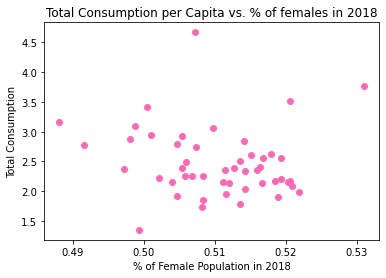

In [16]:
#females and total drinking in 2018

plt.scatter(max_year_df['% Female'],max_year_df["All Consumption"],color='hotpink')

plt.xlabel("% of Female Population in 2018")
plt.ylabel("Total Consumption")
plt.title('Total Consumption per Capita vs. % of females in 2018')

plt.show()


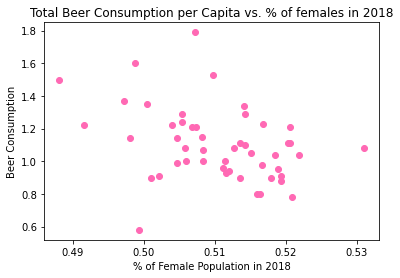

In [17]:
#females and beer drinking in 2018

plt.scatter(max_year_df['% Female'],max_year_df["Beer Consumption"],color='hotpink')

plt.xlabel("% of Female Population in 2018")
plt.ylabel("Beer Consumption")
plt.title('Total Beer Consumption per Capita vs. % of females in 2018')

plt.show()


The correlation between both factors is 0.12
y = 0.0 x + 0.51


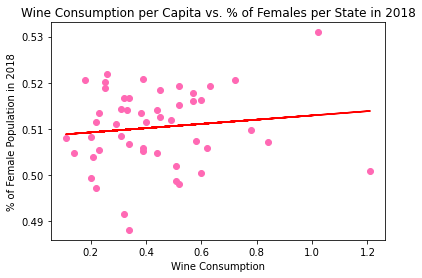

In [18]:
x_values = max_year_df["Wine Consumption"]
y_values = max_year_df['% Female']

#calculate and print correlation coefficient
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

#plot scatter and line
plt.scatter(x_values,y_values,color="hotpink")
plt.plot(x_values,regress_values,'r-')
plt.xlabel('Wine Consumption')
plt.ylabel('% of Female Population in 2018')
plt.title('Wine Consumption per Capita vs. % of Females per State in 2018')
plt.savefig(("Output/FemalesWine.png"))
plt.show()



The correlation between both factors is 0.35
y = 0.01 x + 0.47


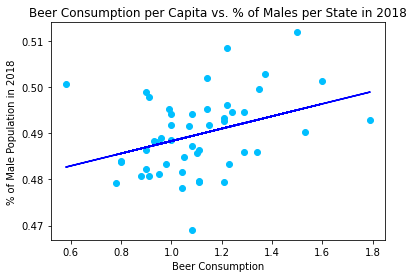

In [19]:
x_values = max_year_df["Beer Consumption"]
y_values = max_year_df['% Male']

#calculate and print correlation coefficient
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)


#plot scatter and line
plt.scatter(x_values,y_values,color="deepskyblue")
plt.plot(x_values,regress_values,'b-',label=line_eq)
plt.xlabel('Beer Consumption')
plt.ylabel('% of Male Population in 2018')
plt.title('Beer Consumption per Capita vs. % of Males per State in 2018')
plt.savefig(("Output/MalesBeer.png"))
plt.show()



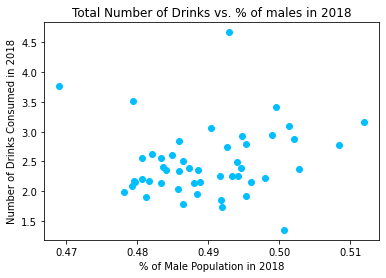

In [20]:
#males and total drinks
plt.scatter(max_year_df['% Male'],max_year_df["All Consumption"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Drinks Consumed in 2018")
plt.title('Total Number of Drinks vs. % of males in 2018')


plt.show()

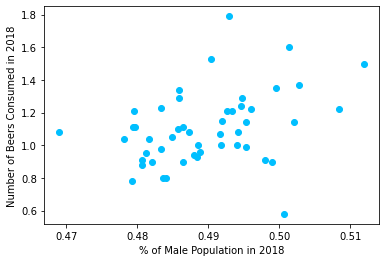

In [21]:
#males and drinks in 2018
plt.scatter(max_year_df['% Male'],max_year_df["Beer Consumption"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Beers Consumed in 2018")


plt.show()

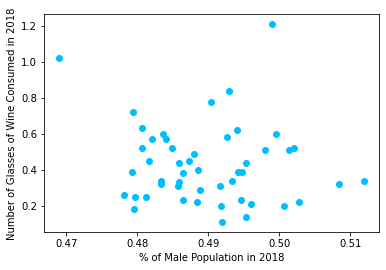

In [22]:
#males and drinks in 2018
plt.scatter(max_year_df['% Male'],max_year_df["Wine Consumption"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Glasses of Wine Consumed in 2018")


plt.show()

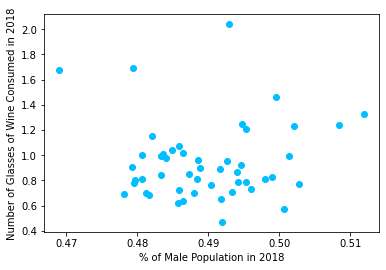

In [23]:
plt.scatter(max_year_df['% Male'],max_year_df["Spirit Consumption"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Glasses of Wine Consumed in 2018")


plt.show()

The correlation between both factors is 0.31
y = 6781.87 x + 18042.99


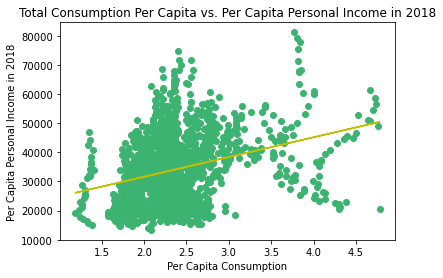

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = all_data["All Consumption"]
y_values = all_data['Per Capita Personal Income']

#calculate and print correlation coefficient
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

#plot scatter and line
plt.scatter(x_values,y_values,color="mediumseagreen")
plt.plot(x_values,regress_values,'y-')
plt.xlabel('Per Capita Consumption')
plt.ylabel('Per Capita Personal Income in 2018')
plt.title('Total Consumption Per Capita vs. Per Capita Personal Income in 2018')
plt.savefig(("Output/ConsumptionvsIncome.png"))
plt.show()

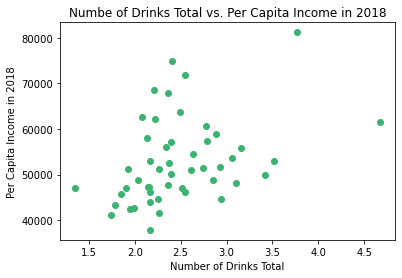

In [25]:
#plot per capita personal income vs. number of drinks total in 2018
plt.scatter(max_year_df["All Consumption"],max_year_df['Per Capita Personal Income'],color="mediumseagreen")

plt.xlabel("Number of Drinks Total")
plt.ylabel("Per Capita Income in 2018")
plt.title('Numbe of Drinks Total vs. Per Capita Income in 2018')

plt.show()

The correlation between both factors is 0.38
y = 6145.85 x + 37647.2


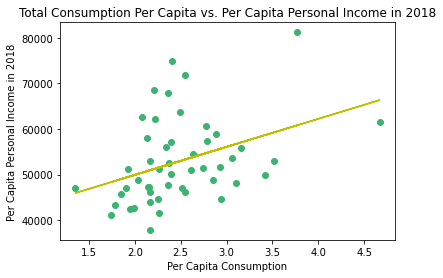

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = max_year_df["All Consumption"]
y_values = max_year_df['Per Capita Personal Income']

#calculate and print correlation coefficient
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

#plot scatter and line
plt.scatter(x_values,y_values,color="mediumseagreen")
plt.plot(x_values,regress_values,'y-')
plt.xlabel('Per Capita Consumption')
plt.ylabel('Per Capita Personal Income in 2018')
plt.title('Total Consumption Per Capita vs. Per Capita Personal Income in 2018')
plt.savefig(("Output/ConsumptionvsIncome.png"))
plt.show()

In [27]:
#load tax data for further analysis and create tax df
tax_load = "alcohol_excise_tax_rates.csv"

tax_data = pd.read_csv(tax_load)

tax_df = tax_data


#rename columns
tax_df = tax_df.rename(columns={'Distilled Spirit Excise Tax Rate':'Spirit Tax Rate',
                                   'Beer Excise Tax Rate': 'Beer Tax Rate',
                                   'Wine Excise Tax Rate': 'Wine Tax Rate'})
tax_df.head()

tax_df.dtypes

State Name            object
State Abbreviation    object
Year                   int64
Spirit Tax Rate       object
Beer Tax Rate         object
Wine Tax Rate         object
dtype: object

In [28]:
#replace n.a and - with zero 
tax_df['Spirit Tax Rate'] = tax_df['Spirit Tax Rate'].replace([' n.a. '],"0")
tax_df['Beer Tax Rate'] = tax_df['Beer Tax Rate'].replace([' n.a. '],"0")
tax_df['Wine Tax Rate'] = tax_df['Wine Tax Rate'].replace([' n.a. '],"0")
tax_df['Wine Tax Rate'] = tax_df['Wine Tax Rate'].replace([' -   '],"0")
tax_df['Spirit Tax Rate'] = tax_df['Spirit Tax Rate'].replace([' -   '],"0")
tax_df['Beer Tax Rate'] = tax_df['Beer Tax Rate'].replace([' -   '],"0")
#make statename lowercase 
tax_df['State Name']= tax_df['State Name'].str.lower()




tax_df.head()

,State Name,State Abbreviation,Year,Spirit Tax Rate,Beer Tax Rate,Wine Tax Rate
0,alabama,AL,1982,0,0.53,0
1,alabama,AL,1983,0,1.05,0
2,alabama,AL,1984,0,1.05,1.7
3,alabama,AL,1985,0,1.05,1.7
4,alabama,AL,1986,0,1.05,1.7


In [29]:
#convert years to integer
tax_df['Year']= tax_df['Year'].astype(int)
tax_df['Spirit Tax Rate'] = tax_df['Spirit Tax Rate'].astype(str).astype(float)
tax_df['Wine Tax Rate'] = tax_df['Wine Tax Rate'].astype(str).astype(float)
tax_df['Beer Tax Rate'] = tax_df['Beer Tax Rate'].astype(str).astype(float)


In [30]:
#check data types for merge

all_data.dtypes

tax_df['Year']= tax_df['Year'].astype(int)
tax_df['Spirit Tax Rate'] = tax_df['Spirit Tax Rate'].astype(int)
tax_df['Wine Tax Rate'] = tax_df['Wine Tax Rate'].astype(int)
tax_df['Beer Tax Rate'] = tax_df['Beer Tax Rate'].astype(int)

In [31]:
#merge to all data
all_tax_data = pd.merge(all_data,tax_df, how="inner",left_on=['State','Year'],right_on =['State Name','Year'])

all_tax_data.head()

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,...,All Consumption,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,State Name,State Abbreviation,Spirit Tax Rate,Beer Tax Rate,Wine Tax Rate
0,alabama,1990,15861.0,4050055,1,1712799.0,1525176.0,3237975.0,0.528972,0.471028,...,1.92,265.481481,35.720930,126.650446,409.600000,alabama,AL,0,1,1
1,arizona,1990,17323.0,3684097,4,1469424.0,1408380.0,2877804.0,0.510606,0.489394,...,2.77,376.888889,73.426357,166.098946,590.933333,arizona,AZ,3,0,0
2,arkansas,1990,14622.0,2356586,5,985649.0,889120.0,1874769.0,0.525744,0.474256,...,1.86,265.481481,25.798450,126.650446,396.800000,arkansas,AR,2,0,0
3,california,1990,21485.0,29959515,6,11823050.0,11709410.0,23532460.0,0.502415,0.497585,...,2.78,312.888889,117.085271,180.632603,593.066667,california,CA,2,0,0
4,colorado,1990,19853.0,3307618,8,1323273.0,1276027.0,2599300.0,0.509088,0.490912,...,2.39,320.000000,57.550388,155.717762,509.866667,colorado,CO,2,0,0


In [32]:

all_tax_data['Total Rate'] = all_tax_data['Spirit Tax Rate'] + all_tax_data['Beer Tax Rate'] + all_tax_data['Wine Tax Rate']

all_tax_data

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,...,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,State Name,State Abbreviation,Spirit Tax Rate,Beer Tax Rate,Wine Tax Rate,Total Rate
0,alabama,1990,15861.0,4050055,1,1712799.0,1525176.0,3237975.0,0.528972,0.471028,...,265.481481,35.720930,126.650446,409.600000,alabama,AL,0,1,1,2
1,arizona,1990,17323.0,3684097,4,1469424.0,1408380.0,2877804.0,0.510606,0.489394,...,376.888889,73.426357,166.098946,590.933333,arizona,AZ,3,0,0,3
2,arkansas,1990,14622.0,2356586,5,985649.0,889120.0,1874769.0,0.525744,0.474256,...,265.481481,25.798450,126.650446,396.800000,arkansas,AR,2,0,0,2
3,california,1990,21485.0,29959515,6,11823050.0,11709410.0,23532460.0,0.502415,0.497585,...,312.888889,117.085271,180.632603,593.066667,california,CA,2,0,0,2
4,colorado,1990,19853.0,3307618,8,1323273.0,1276027.0,2599300.0,0.509088,0.490912,...,320.000000,57.550388,155.717762,509.866667,colorado,CO,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,virginia,2017,55631.0,8463587,51,3590501.0,3424746.0,7015247.0,0.511814,0.488186,...,227.555556,97.240310,139.107867,454.400000,virginia,VA,0,0,1,1
1417,washington,2017,58437.0,7423362,53,3080459.0,3052891.0,6133350.0,0.502247,0.497753,...,220.444444,103.193798,164.022709,475.733333,washington,WA,14,0,0,14
1418,west virginia,2017,38927.0,1817004,54,779222.0,753987.0,1533209.0,0.508229,0.491771,...,277.333333,21.829457,95.506894,371.200000,west virginia,WV,0,0,1,1
1419,wisconsin,2017,49264.0,5790186,55,2429241.0,2376174.0,4805415.0,0.505522,0.494478,...,315.259259,79.379845,261.605839,637.866667,wisconsin,WI,3,0,0,3


In [33]:
max_tax_data = all_tax_data[all_tax_data['Year']==2018]


max_tax_top_5 = max_tax_data.sort_values('Total Rate',ascending=True).head(5)


max_tax_top_5

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,...,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,State Name,State Abbreviation,Spirit Tax Rate,Beer Tax Rate,Wine Tax Rate,Total Rate
1371,wyoming,2018,60689.0,577601,56,232222.0,240123.0,472345.0,0.491636,0.508364,...,289.185185,63.503876,257.453366,593.066667,wyoming,WY,0,0,0,0
1366,vermont,2018,53531.0,624358,50,273598.0,263207.0,536805.0,0.509679,0.490321,...,362.666667,154.790698,157.793998,652.800000,vermont,VT,0,0,0,0
1365,utah,2018,47008.0,3153550,49,1213255.0,1216456.0,2429711.0,0.499341,0.500659,...,137.481482,39.689922,118.345499,288.000000,utah,UT,0,0,0,0
1359,pennsylvania,2018,56032.0,12800922,42,5536472.0,5231354.0,10767826.0,0.514168,0.485832,...,305.777778,65.488372,149.489051,499.200000,pennsylvania,PA,0,0,0,0
1358,oregon,2018,51500.0,4181886,41,1780553.0,1728608.0,3509161.0,0.507401,0.492599,...,286.814815,115.100775,197.242498,584.533333,oregon,OR,0,0,0,0
